In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv("loans_full_schema.csv")

In [3]:
df.head(10)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
5,NaN,NaN,KY,OWN,34000.0,Not Verified,6.46,NaN,NaN,NaN,1,3.0,1990,6,32,12,42100,3898,0,0,60.0,0,0,0,2,5.0,12,0.0,0,1,27200,27,12,5,3,78.1,0,0,other,individual,5000,36,6.72,153.75,A,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
6,hr,10.0,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,0,NaN,2004,1,12,10,291852,18916,0,0,NaN,0,0,2,1,9.0,10,0.0,0,3,9100,8,7,6,2,100.0,0,0,credit_card,joint,24000,60,13.59,553.35,C,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0
7,police,10.0,AZ,MORTGAGE,110000.0,Source Verified,16.19,NaN,NaN,NaN,1,19.0,2005,1,30,15,342336,60805,0,0,71.0,0,0,2,4,7.0,15,NaN,0,5,22250,16,12,10,7,93.0,0,0,debt_consolidation,individual,20000,60,11.99,444.79,B,B5,Jan-2018,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0
8,parts,10.0,NV,MORTGAGE,65000.0,Source Verified,36.48,NaN,NaN,NaN,1,18.0,1998,3,35,21,283190,69561,0,0,18.0,0,0,6,10,4.0,21,0.0,0,11,36700,19,14,14,2,97.1,0,0,home_improvement,individual,20000,36,13.59,679.58,C,C2,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0
9,4th person,3.0,IL,RENT,30000.0,Not Verified,18.91,NaN,NaN,NaN,0,NaN,2001,0,9,6,33114,17768,0,0,NaN,0,0,1,5,17.0,6,0.0,0,3,14700,7,5,3,0,100.0,0,0,credit_card,individual,6400,36,6.71,196.77,A,A3,Mar-2018,Current,fractional,Cash,6077.13,391.15,322.87,68.28,0.0


## Data Cleansing

In [4]:
#check missing data
null_val_df = df.isnull().sum().to_frame()
null_val_df.loc[null_val_df[0]>0]

,0
emp_title,833
emp_length,817
debt_to_income,24
annual_income_joint,8505
verification_income_joint,8545
debt_to_income_joint,8505
months_since_last_delinq,5658
months_since_90d_late,7715
months_since_last_credit_inquiry,1271
num_accounts_120d_past_due,318


In [5]:
#seperate numerical and categorical columns
cols = df.columns
num_cols = df._get_numeric_data().columns
cate_cols = list(set(cols) - set(num_cols))
num_cols = num_cols.to_list()

In [6]:
index = 0
for i in cate_cols:
    index+=1
    print(index,i)
    print("sum of null value: ",df[i].isnull().sum())
    print(df[i].value_counts())
    print("types: ", len(df[i].unique()))
    print("")

#for categorical data, only verification_income_joint and emp_title have null values

1 disbursement_method
sum of null value:  0
Cash         9284
DirectPay     716
Name: disbursement_method, dtype: int64
types:  2

2 issue_month
sum of null value:  0
Mar-2018    3617
Jan-2018    3395
Feb-2018    2988
Name: issue_month, dtype: int64
types:  3

3 sub_grade
sum of null value:  0
B1    647
B2    638
B5    631
C1    597
B4    581
C2    572
A4    568
B3    540
A3    504
C4    503
C3    501
A5    485
A2    480
C5    480
A1    422
D2    323
D1    319
D3    311
D5    262
D4    231
E5     91
E3     73
E4     73
E2     57
E1     41
F1     31
G1     11
F2      9
F3      9
F4      5
F5      4
G4      1
Name: sub_grade, dtype: int64
types:  32

4 loan_status
sum of null value:  0
Current               9375
Fully Paid             447
In Grace Period         67
Late (31-120 days)      66
Late (16-30 days)       38
Charged Off              7
Name: loan_status, dtype: int64
types:  6

5 state
sum of null value:  0
CA    1330
TX     806
NY     793
FL     732
IL     382
OH     338
NJ    

### User attributes data
* emp_title : Job title.

* emp_length : Number of years in the job, rounded down. If longer than 10 years, then this is represented by the value 10.

* state : Two-letter state code.

* home_ownership : The ownership status of the applicant's residence.

* annual_income : Annual income.

* verified_income : Type of verification of the applicant's income.

* debt_to_income : Debt-to-income ratio.

In [7]:
user_df = df.iloc[:,:7]
user_df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96
...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99


In [8]:
user_df.describe()

,emp_length,annual_income,debt_to_income
count,9183.000000,1.000000e+04,9976.000000
mean,5.930306,7.922215e+04,19.308192
std,3.703734,6.473429e+04,15.004851
min,0.000000,0.000000e+00,0.000000
25%,2.000000,4.500000e+04,11.057500
50%,6.000000,6.500000e+04,17.570000
75%,10.000000,9.500000e+04,25.002500
max,10.000000,2.300000e+06,469.090000


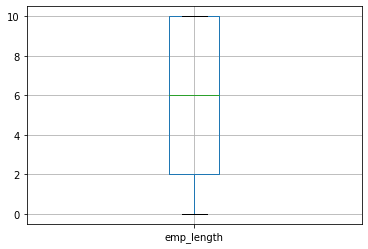

In [9]:
#emp_lenth input NaN with mean (mean and median is close) -> no need remove outliers
user_df.boxplot(column=['emp_length'])
user_df['emp_length'] = user_df['emp_length'].fillna(user_df['emp_length'].mean())

In [10]:
#deal with emp_title, change to proportion, if nan than change to mean
emp_title_df = (user_df.emp_title.value_counts() / len(user_df)).to_frame()
emp_title = []
for i in user_df['emp_title']:
    if i in emp_title_df.index.to_list():
        emp_title.append(emp_title_df.loc[i,'emp_title']) 
    else:
        emp_title.append((user_df.emp_title.value_counts() / len(user_df)).mean())
user_df['emp_title'] = emp_title

In [11]:
#deal with state
state_df = (user_df.state.value_counts() / len(user_df)).to_frame()
state = []
for i in user_df['state']:
    if i in state_df.index.to_list():
        state.append(state_df.loc[i,'state'])
    else:
        state.append((user_df.state.value_counts() / len(user_df)).mean())
user_df['state'] = state
user_df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income
0,0.0001,3.0,0.0338,MORTGAGE,90000.0,Verified,18.01
1,0.0001,10.0,0.0035,RENT,40000.0,Not Verified,5.04
2,0.0002,3.0,0.0128,RENT,40000.0,Source Verified,21.15
3,0.0018,1.0,0.0298,RENT,30000.0,Not Verified,10.16
4,0.0001,10.0,0.1330,RENT,35000.0,Verified,57.96
...,...,...,...,...,...,...,...
9995,0.0029,10.0,0.0806,RENT,108000.0,Source Verified,22.28
9996,0.0046,8.0,0.0298,MORTGAGE,121000.0,Verified,32.38
9997,0.0001,10.0,0.0181,MORTGAGE,67000.0,Verified,45.26
9998,0.0218,1.0,0.0128,MORTGAGE,80000.0,Source Verified,11.99


In [12]:
user_df.describe()

,emp_title,emp_length,state,annual_income,debt_to_income
count,10000.000000,10000.000000,10000.000000,1.000000e+04,9976.000000
mean,0.002378,5.930306,0.049742,7.922215e+04,19.308192
std,0.005250,3.549197,0.040771,6.473429e+04,15.004851
min,0.000100,0.000000,0.001400,0.000000e+00,0.000000
25%,0.000100,3.000000,0.018100,4.500000e+04,11.057500
50%,0.000200,5.930306,0.033400,6.500000e+04,17.570000
75%,0.001400,10.000000,0.079300,9.500000e+04,25.002500
max,0.021800,10.000000,0.133000,2.300000e+06,469.090000


In [13]:
len(emp_title)

10000

In [14]:
#no outlier for annual_income
print(user_df['annual_income'].describe(percentiles = [0.25, 0.75, 0.8, 0.85, 0.9, 0.95]))
print("")


count    1.000000e+04
mean     7.922215e+04
std      6.473429e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.500000e+04
80%      1.040000e+05
85%      1.200000e+05
90%      1.350000e+05
95%      1.750000e+05
max      2.300000e+06
Name: annual_income, dtype: float64



count    9976.000000
mean       19.308192
std        15.004851
min         0.000000
25%        11.057500
50%        17.570000
75%        25.002500
80%        27.030000
85%        29.280000
90%        32.375000
95%        37.232500
max       469.090000
Name: debt_to_income, dtype: float64

(221, 7)

count    10000.000000
mean        19.305110
std         14.986965
min          0.000000
25%         11.067500
50%         17.600000
75%         24.990000
80%         27.022000
85%         29.271500
90%         32.361000
95%         37.220500
max        469.090000
Name: debt_to_income, dtype: float64


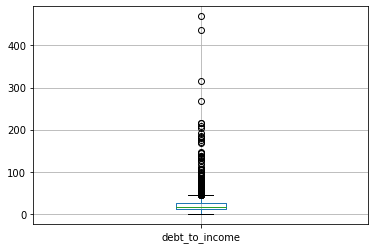

In [15]:
#check outlier for debt_to_income
print(user_df['debt_to_income'].describe(percentiles = [0.25, 0.75, 0.8, 0.85, 0.9, 0.95]))

#outlier = value > 45.92 (by75%+1.5IQR) 
user_df.boxplot(column=['debt_to_income'])

#check rows of outlier
print("")
print(user_df.loc[user_df['debt_to_income']>45.92].shape)

#input NaN value with the mean of value <45.92
user_df['debt_to_income'] = user_df['debt_to_income'].fillna(user_df[user_df['debt_to_income'] < 45.92]['debt_to_income'].mean())

#distribution after fillNA
print("")
print(user_df['debt_to_income'].describe(percentiles = [0.25, 0.75, 0.8, 0.85, 0.9, 0.95]))

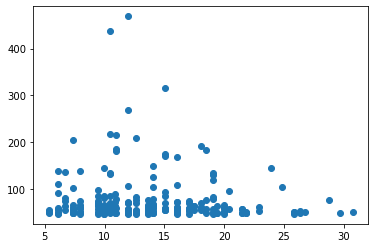

In [16]:
#check relationship between outliers of debt_to_income and interest rate
outlier_df = df.loc[df['debt_to_income']>46]
plt.scatter(outlier_df['interest_rate'],outlier_df['debt_to_income'])
#remove the outliers
user_df = user_df[user_df['debt_to_income']<46]

In [17]:
user_df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income
0,0.000100,3.000000,0.0338,MORTGAGE,90000.0,Verified,18.01
1,0.000100,10.000000,0.0035,RENT,40000.0,Not Verified,5.04
2,0.000200,3.000000,0.0128,RENT,40000.0,Source Verified,21.15
3,0.001800,1.000000,0.0298,RENT,30000.0,Not Verified,10.16
5,0.000193,5.930306,0.0097,OWN,34000.0,Not Verified,6.46
...,...,...,...,...,...,...,...
9995,0.002900,10.000000,0.0806,RENT,108000.0,Source Verified,22.28
9996,0.004600,8.000000,0.0298,MORTGAGE,121000.0,Verified,32.38
9997,0.000100,10.000000,0.0181,MORTGAGE,67000.0,Verified,45.26
9998,0.021800,1.000000,0.0128,MORTGAGE,80000.0,Source Verified,11.99


### Deal with the joint data
* debt_to_income ratio: monthly debt payments divided by your gross monthly income -> measure ability to manage the monthly payments to repay the money you plan to borrow
* annual_income_joint: If this is a joint application, then the annual income of the two parties applying -> adjusted gross income including any income attributable to a spouse or to property owned by a spouse

In [18]:
joint_df = df.iloc[:,7:10]
joint_df

,annual_income_joint,verification_income_joint,debt_to_income_joint
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,57000.0,Verified,37.66
...,...,...,...
9995,NaN,NaN,NaN
9996,NaN,NaN,NaN
9997,107000.0,Source Verified,29.57
9998,NaN,NaN,NaN


In [19]:
joint_df.describe()

,annual_income_joint,debt_to_income_joint
count,1.495000e+03,1495.000000
mean,1.279146e+05,19.979304
std,7.016838e+04,8.054781
min,1.920000e+04,0.320000
25%,8.683350e+04,14.160000
50%,1.130000e+05,19.720000
75%,1.515455e+05,25.500000
max,1.100000e+06,39.980000


In [20]:
#annual_income_joint, debt_to_income_joint have 8505 null values
#verification_income_joint has 8545 null values
#check the difference and decide whether drop them
joint_df_not_null_ver = df.loc[df['verification_income_joint'].notnull()]
joint_df_not_null_income = df.loc[df['annual_income_joint'].notnull()]

joint_df_not_null_ver = joint_df_not_null_ver[['annual_income_joint','verification_income_joint','debt_to_income_joint']]
joint_df_not_null_income = joint_df_not_null_income[['annual_income_joint','verification_income_joint','debt_to_income_joint']]

In [21]:
joint_df_diff = pd.concat([joint_df_not_null_income,joint_df_not_null_ver])
joint_df_diff = joint_df_diff.reset_index(drop=True)
joint_df_diff_gpby = joint_df_diff.groupby(list(joint_df_diff.columns))
#get index of unique records
idx = [x[0] for x in joint_df_diff_gpby.groups.values() if len(x) == 1]
#fileter(fetch the result)
joint_df_diff.reindex(idx)

,annual_income_joint,verification_income_joint,debt_to_income_joint
890,27000.00,NaN,7.60
1168,63750.00,NaN,23.87
1009,72000.00,NaN,27.48
278,74001.00,NaN,20.33
644,84000.00,NaN,16.63
220,84000.00,NaN,19.24
347,84000.00,NaN,25.97
1416,87402.00,NaN,13.49
551,90000.00,NaN,17.53
225,91000.00,NaN,27.81


In [22]:
#get the verification_income_joint's null value in the whole df
debt_to_income_joint_list = joint_df_diff.reindex(idx)['debt_to_income_joint'].to_list()
annual_income_joint_list = joint_df_diff.reindex(idx)['annual_income_joint'].to_list()
joint_diff = df.loc[(df['verification_income_joint'].isnull()) & (df['debt_to_income_joint'].isin(debt_to_income_joint_list)) & (df['annual_income_joint'].isin(annual_income_joint_list))]
joint_not_null_df = df.loc[df['annual_income_joint'].notnull()]


In [23]:
#verification_income_joint is null but annual_income_joint and debt_to_income_joint is not null
joint_diff

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
349,owner,10.0,VA,MORTGAGE,12000.00,Verified,204.13,152000.00,NaN,27.27,0,NaN,1992,1,19,13,406818,86236,0,0,NaN,0,0,2,5,5.0,13,0.0,0,6,57300,14,10,9,3,100.0,0,0,debt_consolidation,joint,29000,60,7.35,579.04,A,A4,Jan-2018,Current,whole,DirectPay,26968.19,2871.520000,2031.81,839.71,0.0
559,police officer,6.0,NJ,MORTGAGE,102000.00,Source Verified,11.39,157000.00,NaN,15.67,0,NaN,2008,3,15,11,382018,30541,0,0,NaN,0,0,2,4,6.0,11,0.0,0,5,63600,11,8,6,2,100.0,0,0,credit_card,joint,40000,60,9.93,848.51,B,B2,Jan-2018,Current,whole,DirectPay,37369.27,4220.480000,2630.73,1589.75,0.0
1295,program director,3.0,NC,RENT,140000.00,Not Verified,21.85,140000.00,NaN,25.12,0,39.0,2004,4,47,30,123273,83527,0,0,NaN,0,249,7,11,8.0,30,0.0,0,12,19800,29,23,19,2,91.5,0,0,debt_consolidation,joint,30000,36,18.06,1085.48,D,D2,Feb-2018,Current,whole,DirectPay,27406.26,4161.320000,2593.74,1567.58,0.0
1351,plumber,10.0,NY,MORTGAGE,60000.00,Not Verified,26.20,150000.00,NaN,23.75,0,NaN,2004,0,24,8,92075,53668,0,0,NaN,0,0,3,2,13.0,8,0.0,0,3,32800,10,5,3,2,100.0,0,0,debt_consolidation,joint,14000,36,7.34,434.46,A,A4,Mar-2018,Current,whole,DirectPay,12947.11,1297.670000,1052.89,244.78,0.0
1442,deputy sheriff,6.0,FL,MORTGAGE,60000.00,Not Verified,30.92,100000.00,NaN,22.47,0,NaN,2011,0,19,11,240520,59362,0,0,NaN,0,0,3,2,15.0,11,0.0,0,5,22800,10,7,5,1,94.7,0,0,debt_consolidation,joint,21000,60,10.42,450.55,B,B3,Mar-2018,Current,whole,DirectPay,20188.39,1339.490000,811.61,527.88,0.0
1623,general manager asset services,0.0,TX,MORTGAGE,200000.00,Source Verified,9.03,267000.00,NaN,10.15,0,32.0,1992,0,17,7,414105,48277,0,0,NaN,0,0,1,1,16.0,7,0.0,0,2,25200,8,5,2,4,76.5,0,0,debt_consolidation,joint,35000,36,10.41,1136.11,B,B3,Mar-2018,Current,whole,DirectPay,32483.00,3367.850000,2517.00,850.85,0.0
1639,designer,2.0,AZ,MORTGAGE,48000.00,Not Verified,21.20,84000.00,NaN,19.24,0,29.0,2007,2,13,10,288112,27188,0,0,NaN,0,0,4,5,4.0,10,0.0,0,3,21200,7,5,3,2,84.6,0,0,credit_card,joint,20000,60,10.90,433.86,B,B4,Mar-2018,Current,whole,DirectPay,19236.52,1210.750000,763.48,447.27,0.0
1693,store manager,7.0,PA,MORTGAGE,46000.00,Not Verified,50.51,91000.00,NaN,27.81,0,65.0,1985,0,28,13,197513,58542,0,0,65.0,0,13482,3,5,NaN,13,0.0,0,4,16400,19,9,9,2,82.1,0,0,debt_consolidation,joint,22000,60,12.61,496.19,C,C1,Mar-2018,Current,fractional,DirectPay,21196.60,1457.750000,803.40,654.35,0.0
1718,NaN,NaN,TX,MORTGAGE,0.00,Verified,NaN,128000.00,NaN,25.95,0,67.0,1996,1,19,10,296223,70537,0,0,NaN,0,0,5,3,8.0,10,0.0,0,1,20000,10,3,3,1,77.8,0,0,debt_consolidation,joint,27800,36,9.43,889.61,B,B1,Feb-2018,Current,whole,DirectPay,25764.48,2661.270000,2035.52,625.75,0.0
1924,western regional manager,10.0,WA,MORTGAGE,180000.00,Verified,43.62,294000.00,NaN,29.52,1,9.0,2003,3,39,18,733755,348361,0,0,NaN,0,1047,6,6,8.0,18,0.0,0,4,51300,17,11,6,3,97.4,0,0,debt_consolidation,joint,40000,60,15.04,952.44,C,C4,Mar-2018,Current,whole,DirectPay,39092.13,1838.040000,907.87,930.17,0.0


In [24]:
#joint df is not null but verification_income_joint include null value
joint_not_null_df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
6,hr,10.0,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,0,NaN,2004,1,12,10,291852,18916,0,0,NaN,0,0,2,1,9.0,10,0.0,0,3,9100,8,7,6,2,100.0,0,0,credit_card,joint,24000,60,13.59,553.35,C,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0
21,warranty administrator,1.0,NV,MORTGAGE,42000.0,Source Verified,32.00,95000.0,Source Verified,16.12,0,NaN,1991,4,19,9,272403,47575,0,1,NaN,0,0,3,5,5.0,9,0.0,0,3,10100,7,5,5,1,100.0,0,1,credit_card,joint,10000,36,11.98,332.05,B,B5,Mar-2018,Current,whole,Cash,9296.37,989.49,703.63,285.86,0.0
32,teacher,9.0,AR,MORTGAGE,50000.0,Verified,36.75,101000.0,Verified,20.92,1,3.0,1982,0,31,20,246210,51523,0,0,NaN,0,0,2,3,17.0,20,0.0,0,8,71100,26,17,10,2,90.3,0,0,credit_card,joint,19000,60,19.03,493.19,D,D3,Feb-2018,Current,whole,Cash,18214.02,1922.54,785.98,1136.56,0.0
37,supplies clerk,10.0,NJ,MORTGAGE,70000.0,Verified,17.06,105000.0,Verified,13.27,0,102.0,1988,2,21,14,363649,29954,0,0,102.0,0,0,3,4,7.0,14,0.0,0,3,12900,15,10,7,2,95.2,0,0,car,joint,24000,60,15.04,571.47,C,C4,Mar-2018,In Grace Period,whole,Cash,23455.27,1102.83,544.73,558.10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,project manager,7.0,KY,MORTGAGE,64000.0,Not Verified,36.49,194000.0,Not Verified,23.72,0,NaN,2002,1,37,14,434447,150679,0,0,NaN,0,0,6,5,11.0,14,0.0,0,4,26900,8,7,6,3,100.0,0,0,credit_card,joint,30000,36,9.93,967.03,B,B2,Jan-2018,In Grace Period,whole,Cash,27089.00,3892.94,2911.00,981.94,0.0
9984,sous chef,7.0,CT,MORTGAGE,49000.0,Source Verified,36.20,99000.0,Source Verified,28.29,0,NaN,2006,5,14,11,300238,47054,0,0,NaN,0,0,3,8,6.0,11,0.0,0,5,34300,7,7,7,1,100.0,0,0,credit_card,joint,31200,60,21.45,851.99,D,D5,Jan-2018,In Grace Period,whole,Cash,29990.90,3333.60,1209.10,2124.50,0.0
9987,credit analyst,6.0,TX,MORTGAGE,55000.0,Source Verified,22.19,100000.0,Not Verified,30.77,0,NaN,2002,0,24,10,273702,57604,0,0,NaN,0,0,2,2,22.0,10,0.0,0,4,39000,10,7,5,3,100.0,0,0,debt_consolidation,joint,16000,60,9.43,335.49,B,B1,Mar-2018,Current,whole,Cash,15365.77,989.71,634.23,355.48,0.0
9991,teacher,10.0,MA,MORTGAGE,75000.0,Source Verified,28.45,210000.0,Source Verified,23.46,0,NaN,2001,2,32,19,594937,53224,0,0,NaN,0,0,3,8,1.0,19,0.0,0,6,49300,18,14,8,4,100.0,0,0,debt_consolidation,joint,35000,60,11.99,778.38,B,B5,Jan-2018,Current,whole,Cash,32813.38,3868.59,2186.62,1681.97,0.0


### User Behavior
* earliest_credit_line : Year of the applicant's earliest line of credit -> should be regard as a categorical column

* inquiries_last_12m : Inquiries into the applicant's credit during the last 12 months.

* total_credit_lines : Total number of credit lines in this applicant's credit history.

* open_credit_lines : Number of currently open lines of credit.

* total_credit_limit : Total available credit, e.g. if only credit cards, then the total of all the credit limits. This excludes a mortgage.

* : total_credit_utilized : Total credit balance, excluding a mortgage.

* num_collections_last_12m : Number of collections in the last 12 months. This excludes medical collections.

* num_historical_failed_to_pay : The number of derogatory public records, which roughly means the number of times the applicant failed to pay.

* months_since_90d_late : Months since the last time the applicant was 90 days late on a payment.

* current_accounts_delinq : Number of accounts where the applicant is currently delinquent.

* total_collection_amount_ever : The total amount that the applicant has had against them in collections.
* earliest_credit_line should be regard as categorical columns

In [25]:
ub_df = df.iloc[:,10:23]
ub_df

,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever
0,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250
1,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0
2,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432
3,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0
4,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,NaN,2008,5,44,13,199195,77963,0,1,NaN,0,0
9996,4,9.0,1994,1,28,15,382061,101571,0,0,9.0,0,0
9997,2,6.0,2004,0,18,11,346402,95421,0,0,NaN,0,0
9998,0,NaN,1999,1,38,15,294475,27641,0,0,NaN,0,0


In [26]:
ub_df.describe()

,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever
count,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,2285.000000,10000.0000,10000.000000
mean,0.21600,36.760709,2001.29000,1.95820,22.679600,11.40440,1.836062e+05,51049.063100,0.013800,0.167100,46.112473,0.0001,184.334000
std,0.68366,21.634939,7.79551,2.38013,11.885439,5.86828,1.876327e+05,53636.731172,0.126535,0.687768,21.748021,0.0100,2206.389859
min,0.00000,1.000000,1963.00000,0.00000,2.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,2.000000,0.0000,0.000000
25%,0.00000,19.000000,1997.00000,0.00000,14.000000,7.00000,5.159375e+04,19185.500000,0.000000,0.000000,29.000000,0.0000,0.000000
50%,0.00000,34.000000,2003.00000,1.00000,21.000000,10.00000,1.146670e+05,36927.000000,0.000000,0.000000,47.000000,0.0000,0.000000
75%,0.00000,53.000000,2006.00000,3.00000,29.000000,14.00000,2.675500e+05,65421.000000,0.000000,0.000000,63.000000,0.0000,0.000000
max,13.00000,118.000000,2015.00000,29.00000,87.000000,51.00000,3.386034e+06,942456.000000,3.000000,52.000000,128.000000,1.0000,199308.000000


In [27]:
#look into delinquencies data
delinq_df = ub_df[['delinq_2y','months_since_last_delinq']]

#check data is correct(months_since_last_delinq is NaN but delinq_2y != 0)
wrong_delinq_list = delinq_df.loc[(delinq_df['months_since_last_delinq'].isnull()) & (delinq_df['delinq_2y'] != 0)].index.to_list()
print("Index should be removed: ", wrong_delinq_list)

#check data is correct(last delinq is not over two years but month is not correct)
delinq_df.loc[(delinq_df['months_since_last_delinq']<24) & (delinq_df['delinq_2y'] == 0)]
#index 9856 has problems
wrong_delinq_list.append(9856)

Index should be removed:  [1159, 1938, 2650, 4509, 4624, 5579, 7295, 7615, 8036, 8236, 8363, 9530]


In [28]:
#drop values
ub_df = ub_df.drop(wrong_delinq_list)

In [29]:
#calculate open_credit_lines_percentage, credit_utilized_rate, transfer NaN of months_since_90d_late, months_since_last_delinq to 0
ub_df['open_credit_lines_percentage'] = ub_df['open_credit_lines'] / ub_df['total_credit_lines']
ub_df['credit_utilized_rate'] = ub_df['total_credit_utilized'] / ub_df['total_credit_limit']
ub_df['credit_utilized_rate'] = ub_df['credit_utilized_rate'].fillna(0)
ub_df['months_since_90d_late'] = ub_df['months_since_90d_late'].fillna(0)
ub_df['months_since_last_delinq'] = ub_df['months_since_last_delinq'].fillna(0)
ub_df

,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,open_credit_lines_percentage,credit_utilized_rate
0,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,0.357143,0.547595
1,0,0.0,1996,1,30,14,28800,4321,0,1,0.0,0,0,0.466667,0.150035
2,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,0.322581,0.661348
3,0,0.0,2007,0,4,4,25400,4997,0,1,0.0,0,0,1.000000,0.196732
4,0,0.0,2008,7,22,16,69839,52722,0,0,0.0,0,0,0.727273,0.754908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0.0,2008,5,44,13,199195,77963,0,1,0.0,0,0,0.295455,0.391390
9996,4,9.0,1994,1,28,15,382061,101571,0,0,9.0,0,0,0.535714,0.265850
9997,2,6.0,2004,0,18,11,346402,95421,0,0,0.0,0,0,0.611111,0.275463
9998,0,0.0,1999,1,38,15,294475,27641,0,0,0.0,0,0,0.394737,0.093865


<AxesSubplot:>

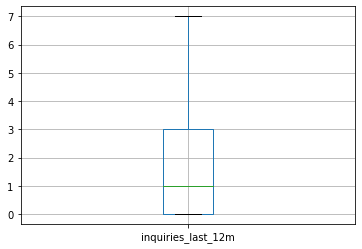

In [30]:
#remove inquiries_last_12m outliers
#remove value > 7.5 
ub_df = ub_df[ub_df['inquiries_last_12m']<7.5]
ub_df.boxplot(column=['inquiries_last_12m'])

In [31]:
#check current delinq account check number of collections in the last 12 months
ub_df.loc[ub_df['current_accounts_delinq']>0]
ub_df = ub_df.drop([1125])

In [32]:
#check number of collections in the last 12 months
ub_df.loc[ub_df['num_collections_last_12m']>0]['num_collections_last_12m'].value_counts()

1    113
2      8
Name: num_collections_last_12m, dtype: int64

In [33]:
#check number of failed to pay
print(ub_df.loc[ub_df['num_historical_failed_to_pay']>0]['num_historical_failed_to_pay'].value_counts())
#find the outlier
ub_df.loc[ub_df['num_historical_failed_to_pay']>7]
ub_df = ub_df.drop([4711])

1     1222
2       72
3       26
4       11
5        4
6        2
7        2
52       1
Name: num_historical_failed_to_pay, dtype: int64


In [34]:
# #earliest_credit_line to datetime
# ub_df['earliest_credit_line'] = pd.to_datetime(ub_df['earliest_credit_line'],format='%Y')

### Acconts
* current_installment_accounts : Number of installment accounts, which are (roughly) accounts with a fixed payment amount and period. A typical example might be a 36-month car loan.

* accounts_opened_24m : Number of new lines of credit opened in the last 24 months.

* months_since_last_credit_inquiry : Number of months since the last credit inquiry on this applicant.

* num_satisfactory_accounts : Number of satisfactory accounts.

* num_accounts_120d_past_due : Number of current accounts that are 120 days past due.

* num_accounts_30d_past_due : Number of current accounts that are 30 days past due.

* num_active_debit_accounts : Number of currently active bank cards.

* total_debit_limit : Total of all bank card limits.

* num_total_cc_accounts : Total number of credit card accounts in the applicant's history.

* num_open_cc_accounts : Total number of currently open credit card accounts.

* num_cc_carrying_balance : Number of credit cards that are carrying a balance.

* num_mort_accounts : Number of mortgage accounts.

* account_never_delinq_percent : Percent of all lines of credit where the applicant was never delinquent.

In [35]:
account_df = df.iloc[:,23:36]
account_df

,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent
0,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9
1,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0
2,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5
3,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0
4,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,8,6.0,13,0.0,0,4,44600,22,9,4,1,100.0
9996,3,0,1.0,15,0.0,0,5,28200,18,11,8,2,82.1
9997,3,4,16.0,11,0.0,0,5,14900,9,7,5,2,72.2
9998,2,2,5.0,15,0.0,0,1,46000,15,9,2,6,100.0


In [36]:
account_df.describe(percentiles = [0.25, 0.75, 0.8, 0.85, 0.9, 0.95])

,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent
count,10000.000000,10000.000000,8729.000000,10000.000000,9682.0,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.663600,4.376100,7.340703,11.379600,0.0,0.0001,3.595300,27357.410300,13.030000,8.095000,5.230500,1.383100,94.648990
std,2.935387,3.158583,5.981590,5.859705,0.0,0.0100,2.434689,26570.164081,7.874713,4.906606,3.327623,1.717274,9.155059
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,14.300000
25%,1.000000,2.000000,2.000000,7.000000,0.0,0.0000,2.000000,10000.000000,7.000000,5.000000,3.000000,0.000000,92.600000
50%,2.000000,4.000000,6.000000,10.000000,0.0,0.0000,3.000000,19500.000000,11.000000,7.000000,5.000000,1.000000,100.000000
75%,3.000000,6.000000,11.000000,14.000000,0.0,0.0000,5.000000,36100.000000,17.000000,10.000000,7.000000,2.000000,100.000000
80%,4.000000,7.000000,13.000000,16.000000,0.0,0.0000,5.000000,41700.000000,19.000000,11.000000,7.000000,3.000000,100.000000
85%,5.000000,7.000000,14.000000,17.000000,0.0,0.0000,6.000000,48800.000000,21.000000,13.000000,8.000000,3.000000,100.000000
90%,6.000000,9.000000,17.000000,19.000000,0.0,0.0000,7.000000,59700.000000,24.000000,15.000000,10.000000,4.000000,100.000000


In [37]:
#check null value
null_val_account_df = account_df.isnull().sum().to_frame()
null_val_account_df.loc[null_val_account_df[0]>0]

,0
months_since_last_credit_inquiry,1271
num_accounts_120d_past_due,318


,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent
0,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9
1,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0
2,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5
3,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0
4,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,8,6.0,13,0.0,0,4,44600,22,9,4,1,100.0
9996,3,0,1.0,15,0.0,0,5,28200,18,11,8,2,82.1
9997,3,4,16.0,11,0.0,0,5,14900,9,7,5,2,72.2
9998,2,2,5.0,15,0.0,0,1,46000,15,9,2,6,100.0


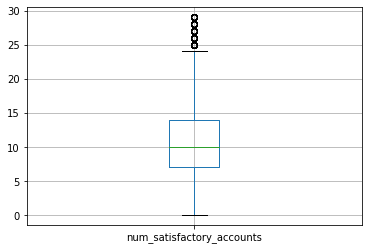

In [38]:
#remove num_satisfactory_accounts outliers (>25)

account_df = account_df[account_df['num_satisfactory_accounts']<30]
account_df.boxplot(column=['num_satisfactory_accounts'])
account_df

,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent
0,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9
1,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0
2,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5
3,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0
5,0,2,5.0,12,0.0,0,1,27200,27,12,5,3,78.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,8,6.0,13,0.0,0,4,44600,22,9,4,1,100.0
9996,3,0,1.0,15,0.0,0,5,28200,18,11,8,2,82.1
9997,3,4,16.0,11,0.0,0,5,14900,9,7,5,2,72.2
9998,2,2,5.0,15,0.0,0,1,46000,15,9,2,6,100.0


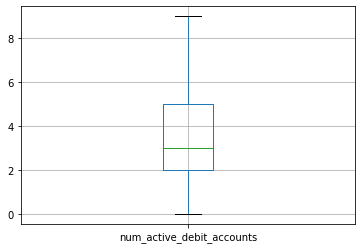

In [39]:
#remove num_active_debit_accounts outliers(>10)
account_df = account_df.loc[account_df['num_active_debit_accounts'] <10]
account_df.boxplot(column=['num_active_debit_accounts'])
account_df

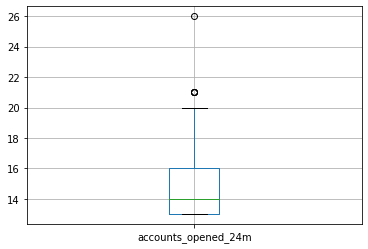

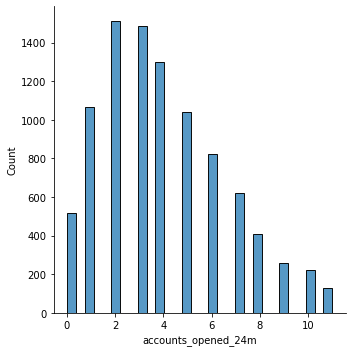

In [40]:
#accounts_opened_24m outliers(>12)
accounts_opened_24m_woo = account_df.loc[account_df['accounts_opened_24m'] >12]
accounts_opened_24m_woo.boxplot(column=['accounts_opened_24m'])
account_df = account_df[account_df['accounts_opened_24m']<12]
sns.displot(account_df['accounts_opened_24m'])

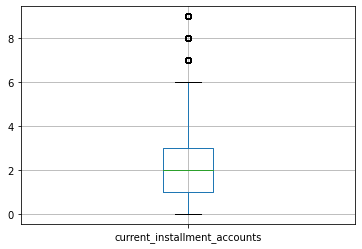

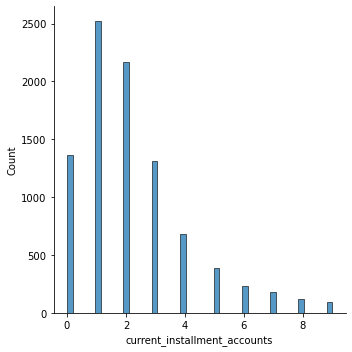

In [41]:
# current_installment_accounts outliers (>6)
current_installment_accounts_woo = account_df.loc[account_df['current_installment_accounts'] < 10]
current_installment_accounts_woo.boxplot(column=['current_installment_accounts'])
account_df = account_df[account_df['current_installment_accounts'] < 10]
sns.displot(account_df['current_installment_accounts'])

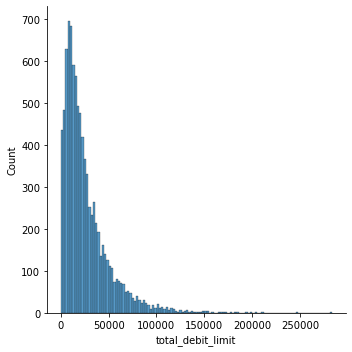

In [42]:
#total debit limi
sns.displot(account_df['total_debit_limit'])


<AxesSubplot:>

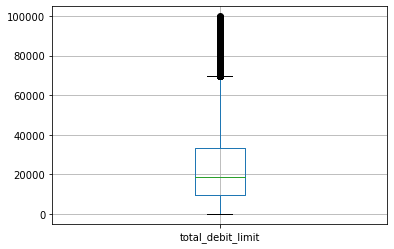

In [43]:
#remove total_debit_limit outliers
# account_df.boxplot(column=['total_debit_limit'])
account_df = account_df[account_df['total_debit_limit'] < 100000]
account_df.boxplot(column=['total_debit_limit'])

In [44]:
#months_since_last_credit_inquiry NaN to 0
account_df['months_since_last_credit_inquiry'] = account_df['months_since_last_credit_inquiry'].fillna(0)

In [45]:
#check Number of current accounts that are 120 days past due.
account_df.loc[account_df['num_accounts_120d_past_due']>0]['num_accounts_120d_past_due'].value_counts()
# -> no value

#fill na with 0
account_df['num_accounts_120d_past_due'] = account_df['num_accounts_120d_past_due'].fillna(0)

In [46]:
#check Number of current accounts that are 30 days past due.
account_df.loc[account_df['num_accounts_30d_past_due']>0]
account_df.drop([1125])

,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent
0,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9
1,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0
3,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0
5,0,2,5.0,12,0.0,0,1,27200,27,12,5,3,78.1
6,2,1,9.0,10,0.0,0,3,9100,8,7,6,2,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,8,6.0,13,0.0,0,4,44600,22,9,4,1,100.0
9996,3,0,1.0,15,0.0,0,5,28200,18,11,8,2,82.1
9997,3,4,16.0,11,0.0,0,5,14900,9,7,5,2,72.2
9998,2,2,5.0,15,0.0,0,1,46000,15,9,2,6,100.0


In [47]:
#check number of mortgage accounts
account_df.loc[account_df['num_mort_accounts']>7]
account_df = account_df[account_df['num_mort_accounts'] <= 7]

In [48]:
account_df['open_cc_acounts_rate'] = account_df['num_open_cc_accounts'] / account_df['num_total_cc_accounts']
account_df['open_cc_carrying_balance_rate'] = account_df['num_cc_carrying_balance'] / account_df['num_total_cc_accounts']

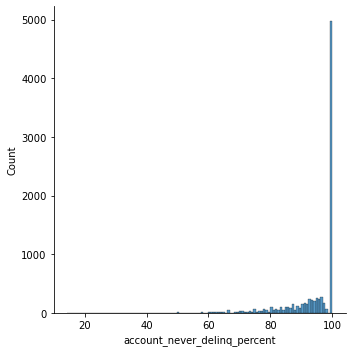

In [49]:
sns.displot(account_df['account_never_delinq_percent'])

In [50]:
account_df.describe(percentiles = [0.25, 0.75, 0.8, 0.85, 0.9, 0.95])

,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,open_cc_acounts_rate,open_cc_carrying_balance_rate
count,8844.000000,8844.000000,8844.000000,8844.000000,8844.0,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000,8844.000000
mean,2.197761,3.954093,6.496947,10.244686,0.0,0.000113,3.292062,23989.457372,12.164971,7.447196,4.857078,1.320782,94.455439,0.657022,0.453850
std,1.892901,2.572468,6.169099,4.672571,0.0,0.010633,1.957903,19723.313661,6.964753,4.092761,2.806459,1.599818,9.309727,0.210434,0.227460
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,14.300000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,7.000000,0.0,0.000000,2.000000,9500.000000,7.000000,4.000000,3.000000,0.000000,92.000000,0.500000,0.285714
50%,2.000000,4.000000,5.000000,10.000000,0.0,0.000000,3.000000,18400.000000,11.000000,7.000000,4.000000,1.000000,100.000000,0.666667,0.428571
75%,3.000000,6.000000,10.000000,13.000000,0.0,0.000000,4.000000,33412.500000,16.000000,10.000000,6.000000,2.000000,100.000000,0.807220,0.600000
80%,3.000000,6.000000,12.000000,14.000000,0.0,0.000000,5.000000,37900.000000,17.000000,10.000000,7.000000,3.000000,100.000000,0.846154,0.666667
85%,4.000000,7.000000,14.000000,15.000000,0.0,0.000000,5.000000,44455.000000,19.000000,12.000000,8.000000,3.000000,100.000000,0.888889,0.700000
90%,5.000000,8.000000,16.000000,17.000000,0.0,0.000000,6.000000,52500.000000,22.000000,13.000000,9.000000,4.000000,100.000000,1.000000,0.777778


/Users/xulehao/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/xulehao/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/xulehao/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

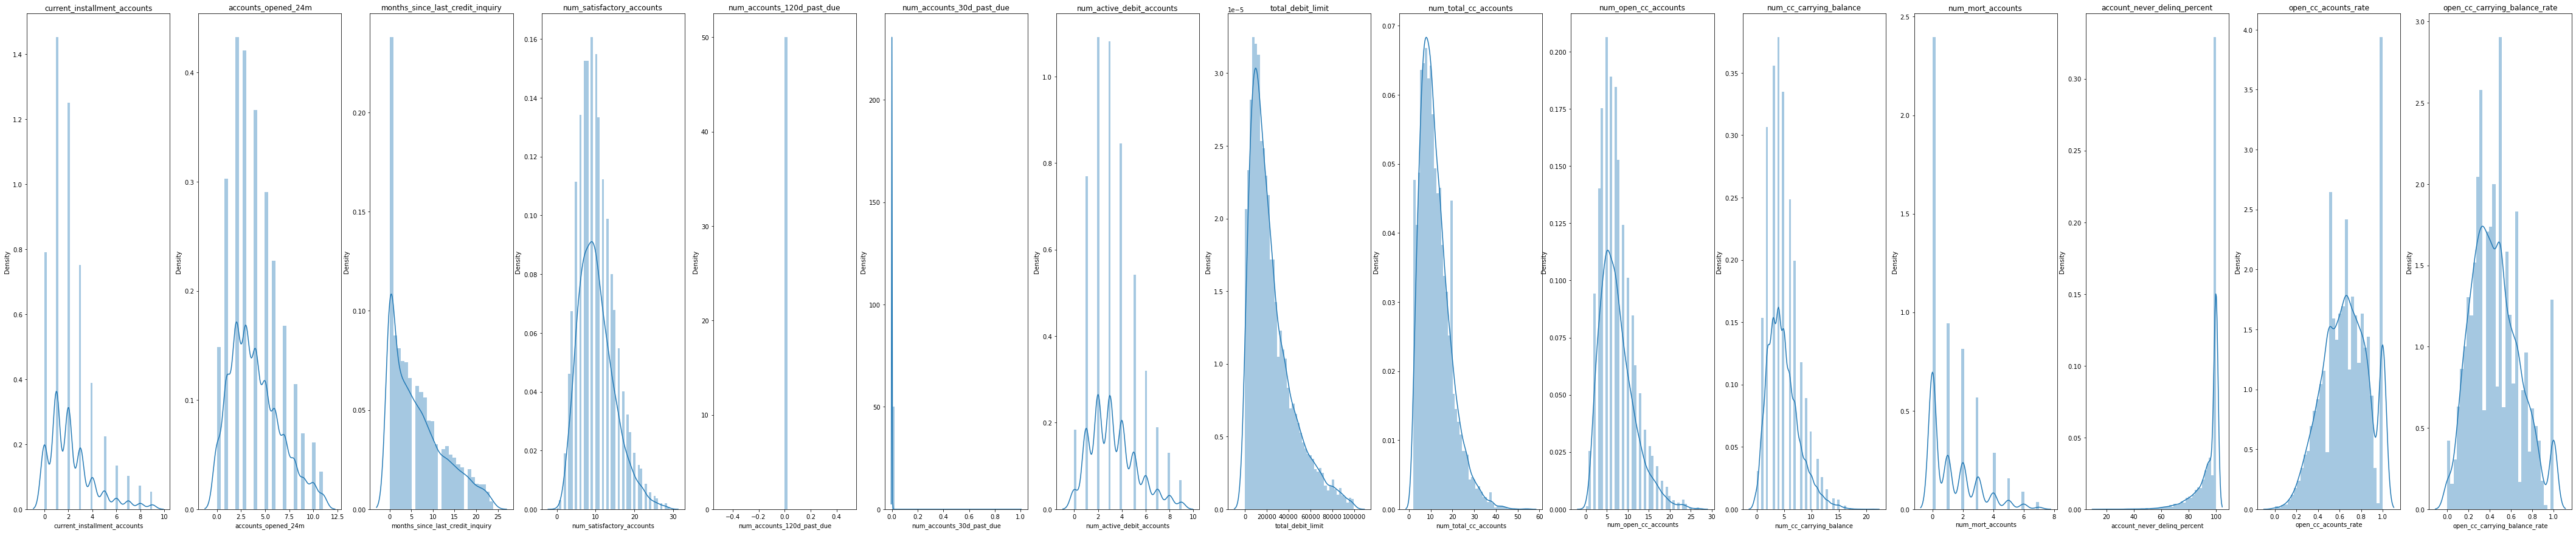

In [51]:
account_col_nums = len(account_df.columns)
fig,axes=plt.subplots(figsize=(5*account_col_nums,account_col_nums), nrows=1, ncols=account_col_nums)
# sns.distplot(account_df[num_cols[0]], ax=axes[0]).set_title(num_cols[0])
for i in range(account_col_nums):
  sns.distplot(account_df[account_df.columns[i]], ax=axes[i]).set_title(account_df.columns[i])

In [52]:
account_df

,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,open_cc_acounts_rate,open_cc_carrying_balance_rate
0,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0.571429,0.428571
1,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0.583333,0.166667
3,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1.000000,0.666667
5,0,2,5.0,12,0.0,0,1,27200,27,12,5,3,78.1,0.444444,0.185185
6,2,1,9.0,10,0.0,0,3,9100,8,7,6,2,100.0,0.875000,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,8,6.0,13,0.0,0,4,44600,22,9,4,1,100.0,0.409091,0.181818
9996,3,0,1.0,15,0.0,0,5,28200,18,11,8,2,82.1,0.611111,0.444444
9997,3,4,16.0,11,0.0,0,5,14900,9,7,5,2,72.2,0.777778,0.555556
9998,2,2,5.0,15,0.0,0,1,46000,15,9,2,6,100.0,0.600000,0.133333


### Loan
* tax_liens : a numeric vector

* public_record_bankrupt : Number of bankruptcies listed in the public record for this applicant.

* loan_purpose : The category for the purpose of the loan.

* application_type : The type of application: either individual or joint.

* loan_amount : The amount of the loan the applicant received.

* term : The number of months of the loan the applicant received.

* interest_rate : Interest rate of the loan the applicant received.

* installment : Monthly payment for the loan the applicant received.

* grade : Grade associated with the loan.

* sub_grade : Detailed grade associated with the loan.

* issue_month : Month the loan was issued.

* loan_status : Status of the loan.

* initial_listing_status : Initial listing status of the loan. (I think this has to do with whether the lender provided the entire loan or if the loan is across multiple lenders.)

* disbursement_method : Dispersement method of the loan.

* balance : Current balance on the loan.

* paid_total : Total that has been paid on the loan by the applicant.

* paid_principal : The difference between the original loan amount and the current balance on the loan.

* paid_interest : The amount of interest paid so far by the applicant.

* paid_late_fees : Late fees paid by the applicant.

In [53]:
loan_df = df.iloc[:,36:]
loan_df

,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,other,individual,24000,36,7.35,744.90,A,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,0,0,debt_consolidation,individual,10000,36,19.03,366.72,D,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,0,0,debt_consolidation,joint,30000,36,23.88,1175.10,E,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,0,0,other,individual,24000,36,5.32,722.76,A,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [54]:
loan_df.describe(percentiles = [0.25, 0.75, 0.5, 0.8, 0.85, 0.9, 0.95])

,tax_liens,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.043300,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,0.593852,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,0.000000,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,0.000000,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
80%,0.000000,0.000000,25000.000000,60.000000,16.020000,713.332000,23289.284000,2999.680000,1953.970000,945.170000,0.000000
85%,0.000000,0.000000,30000.000000,60.000000,18.060000,804.270000,26701.011500,3453.257000,2363.339000,1104.763000,0.000000
90%,0.000000,1.000000,32000.000000,60.000000,19.420000,909.499000,29768.890000,4163.408054,3026.020000,1321.992000,0.000000


0     9754
1      165
2       48
3       18
4        7
5        5
52       1
6        1
7        1
Name: tax_liens, dtype: int64


/Users/xulehao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


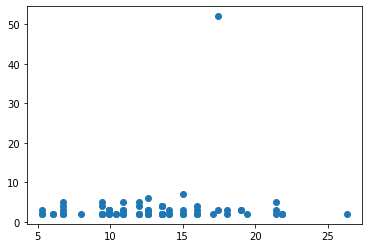

In [55]:
#check data
#remove tax_liens outliers(>1)
print(loan_df['tax_liens'].value_counts())
tax_liens_oo = loan_df.loc[loan_df['tax_liens'] > 1]
#relationship between tax_liens and intersest rate
plt.scatter(tax_liens_oo['interest_rate'],tax_liens_oo['tax_liens'])
# -> not relavant
loan_df = loan_df[loan_df['tax_liens']<2]
tax_liens_oo

#tax_liens change to categorical data
loan_df.loc[loan_df.tax_liens == 1, 'tax_liens'] = 'yes'
loan_df.loc[loan_df.tax_liens == 0, 'tax_liens'] = 'no'

In [56]:
#drop public_record_bankrupt
loan_df.drop([1754,2569,6173])
loan_df.loc[loan_df['public_record_bankrupt']>2]

,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
1754,no,3,credit_card,individual,13000,60,10.42,278.91,B,B3,Jan-2018,Current,whole,DirectPay,12155.32,1387.02,844.68,542.34,0.0
2569,no,3,other,individual,8000,36,18.06,289.47,D,D2,Feb-2018,Current,whole,Cash,7485.12,860.38,514.88,345.50,0.0
6173,yes,3,debt_consolidation,individual,10000,36,10.90,326.92,B,B4,Mar-2018,Current,whole,Cash,9285.29,974.70,714.71,259.99,0.0


In [57]:
loan_df['term'].value_counts()
#term change to categorical column
loan_df.loc[loan_df.term == 60, 'term'] = 'long'
loan_df.loc[loan_df.term == 36, 'term'] = 'short'

/Users/xulehao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [58]:
test = df.loc[(df['application_type']=='joint')&(df['annual_income_joint'].notnull())&(df['debt_to_income_joint'].notnull())]
# annual_income_joint, debt_to_income_joint
test

#can filter joint type by df['application_type']=='joint'
loan_df = loan_df[loan_df['application_type']!='joint']

/Users/xulehao/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'interest_rate')

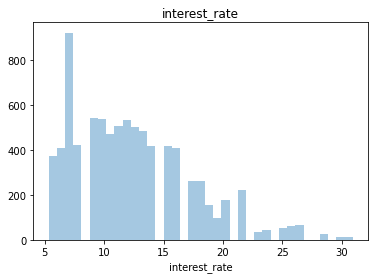

In [59]:
#plot interest rate
sns.distplot(loan_df['interest_rate'], kde=False).set_title('interest_rate')

<AxesSubplot:>

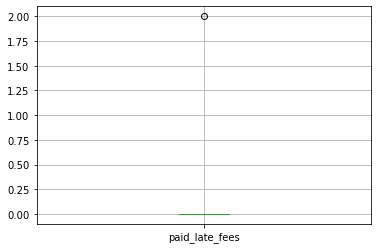

In [60]:
#remove paid_late_fees outliers
loan_df = loan_df[loan_df['paid_late_fees']<10]
loan_df.boxplot(column=['paid_late_fees'])

## Merge Dataset

In [61]:
merge_df = pd.merge(loan_df, user_df,how='inner', left_index=True, right_index=True)
merge_df = pd.merge(merge_df, account_df,how='inner', left_index=True, right_index=True)
merge_df = pd.merge(merge_df, ub_df,how='inner', left_index=True, right_index=True)

In [62]:
#remove verification_income_joint is null but annual_income_joint and debt_to_income_joint is not null list in merge_df
joint_list = joint_diff.index.to_list()
dup = set(merge_df.index.to_list()).intersection(set(joint_list))
dup
#no duplicate

set()

In [63]:
merge_df

,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,open_cc_acounts_rate,open_cc_carrying_balance_rate,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,open_credit_lines_percentage,credit_utilized_rate
0,no,0,moving,individual,28000,long,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,0.000100,3.000000,0.0338,MORTGAGE,90000.0,Verified,18.01,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0.571429,0.428571,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,0.357143,0.547595
1,no,1,debt_consolidation,individual,5000,short,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,0.000100,10.000000,0.0035,RENT,40000.0,Not Verified,5.04,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0.583333,0.166667,0,0.0,1996,1,30,14,28800,4321,0,1,0.0,0,0,0.466667,0.150035
3,yes,0,debt_consolidation,individual,21600,short,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,0.001800,1.000000,0.0298,RENT,30000.0,Not Verified,10.16,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1.000000,0.666667,0,0.0,2007,0,4,4,25400,4997,0,1,0.0,0,0,1.000000,0.196732
5,no,0,other,individual,5000,short,6.72,153.75,A,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0,0.000193,5.930306,0.0097,OWN,34000.0,Not Verified,6.46,0,2,5.0,12,0.0,0,1,27200,27,12,5,3,78.1,0.444444,0.185185,1,3.0,1990,6,32,12,42100,3898,0,0,60.0,0,0,0.375000,0.092589
7,no,0,debt_consolidation,individual,20000,long,11.99,444.79,B,B5,Jan-2018,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0,0.000400,10.000000,0.0255,MORTGAGE,110000.0,Source Verified,16.19,2,4,7.0,15,0.0,0,5,22250,16,12,10,7,93.0,0.750000,0.625000,1,19.0,2005,1,30,15,342336,60805,0,0,71.0,0,0,0.500000,0.177618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,no,0,credit_card,individual,4800,short,10.41,155.81,B,B3,Mar-2018,Current,fractional,Cash,1854.81,3064.65,2945.19,119.46,0.0,0.000100,1.000000,0.0235,RENT,40000.0,Not Verified,12.07,8,3,16.0,13,0.0,0,3,11800,5,5,3,0,88.9,1.000000,0.600000,0,62.0,2008,0,18,13,50932,46132,0,0,62.0,0,0,0.722222,0.905757
9995,no,1,other,individual,24000,short,7.35,744.90,A,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0,0.002900,10.000000,0.0806,RENT,108000.0,Source Verified,22.28,3,8,6.0,13,0.0,0,4,44600,22,9,4,1,100.0,0.409091,0.181818,0,0.0,2008,5,44,13,199195,77963,0,1,0.0,0,0,0.295455,0.391390
9996,no,0,debt_consolidation,individual,10000,short,19.03,366.72,D,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0,0.004600,8.000000,0.0298,MORTGAGE,121000.0,Verified,32.38,3,0,1.0,15,0.0,0,5,28200,18,11,8,2,82.1,0.611111,0.444444,4,9.0,1994,1,28,15,382061,101571,0,0,9.0,0,0,0.535714,0.265850
9998,no,0,other,individual,24000,short,5.32,722.76,A,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0,0.021800,1.000000,0.0128,MORTGAGE,80000.0,Source Verified,11.99,2,2,5.0,15,0.0,0,1,46000,15,9,2,6,100.0,0.600000,0.133333,0,0.0,1999,1,38,15,294475,27641,0,0,0.0,0,0,0.394737,0.0938

In [64]:
merge_df.isna().sum()

tax_liens                           0
public_record_bankrupt              0
loan_purpose                        0
application_type                    0
loan_amount                         0
term                                0
interest_rate                       0
installment                         0
grade                               0
sub_grade                           0
issue_month                         0
loan_status                         0
initial_listing_status              0
disbursement_method                 0
balance                             0
paid_total                          0
paid_principal                      0
paid_interest                       0
paid_late_fees                      0
emp_title                           0
emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
current_inst

## Visualization

In [65]:
cols = merge_df.columns
num_cols = merge_df._get_numeric_data().columns
cate_cols = list(set(cols) - set(num_cols))
num_cols = num_cols.to_list()

In [66]:
cate_cols

['disbursement_method',
 'issue_month',
 'term',
 'sub_grade',
 'loan_status',
 'grade',
 'homeownership',
 'initial_listing_status',
 'loan_purpose',
 'tax_liens',
 'application_type',
 'verified_income']

In [67]:
#plot relationship between categorical columns and interest rate
# cate_cols_size = len(cate_cols)

# fig,axes=plt.subplots(figsize=(15*cate_cols_size,30*cate_cols_size), nrows=cate_cols_size, ncols=1)
# for i in range(cate_cols_size):
#     sns.barplot(x = cate_cols[i], y = 'interest_rate', data = merge_df, ax=axes[i])

<AxesSubplot:xlabel='homeownership', ylabel='interest_rate'>

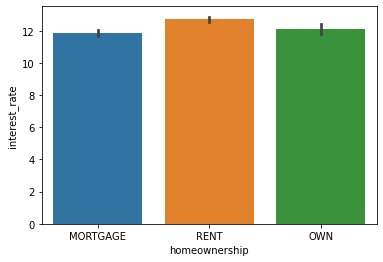

In [68]:
sns.barplot(x = 'homeownership', y = 'interest_rate', data = merge_df)

<AxesSubplot:xlabel='grade', ylabel='interest_rate'>

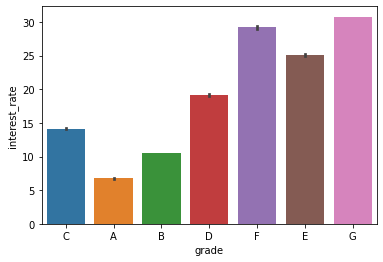

In [69]:
sns.barplot(x = 'grade', y = 'interest_rate', data = merge_df)

<AxesSubplot:xlabel='loan_status', ylabel='interest_rate'>

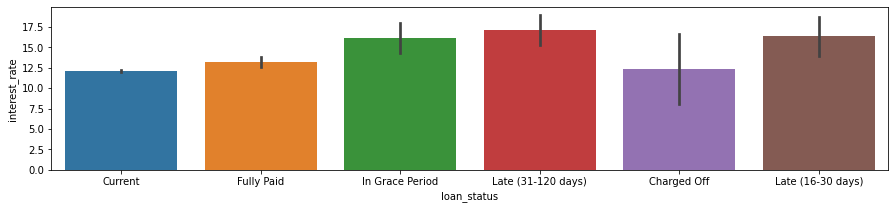

In [70]:
fig,axes=plt.subplots(figsize=(15,3))
sns.barplot(x = 'loan_status', y = 'interest_rate', data = merge_df)

<AxesSubplot:xlabel='sub_grade', ylabel='interest_rate'>

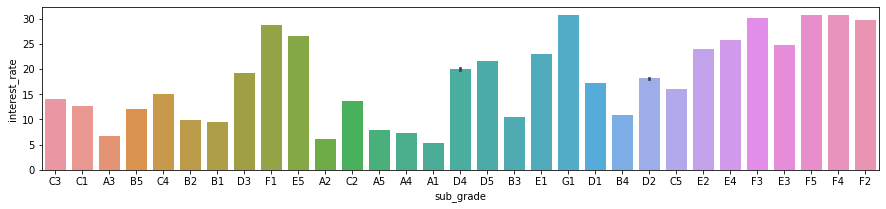

In [71]:
fig,axes=plt.subplots(figsize=(15,3))
sns.barplot(x = 'sub_grade', y = 'interest_rate', data = merge_df)

<AxesSubplot:xlabel='disbursement_method', ylabel='interest_rate'>

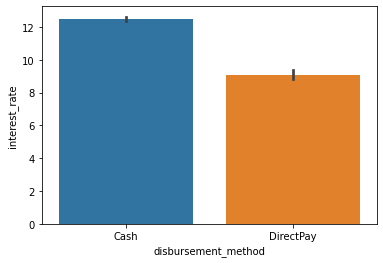

In [72]:
sns.barplot(x = 'disbursement_method', y = 'interest_rate', data = merge_df)

<AxesSubplot:xlabel='tax_liens', ylabel='interest_rate'>

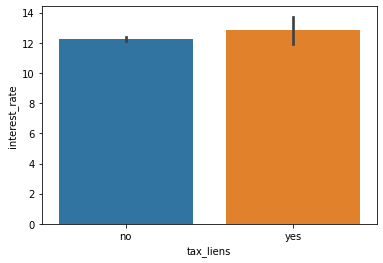

In [73]:
sns.barplot(x = 'tax_liens', y = 'interest_rate', data = merge_df)

<AxesSubplot:xlabel='application_type', ylabel='interest_rate'>

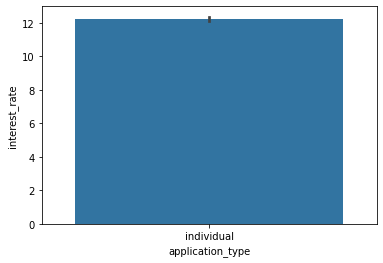

In [74]:
sns.barplot(x = 'application_type', y = 'interest_rate', data = merge_df)
#drop column

<AxesSubplot:xlabel='verified_income', ylabel='interest_rate'>

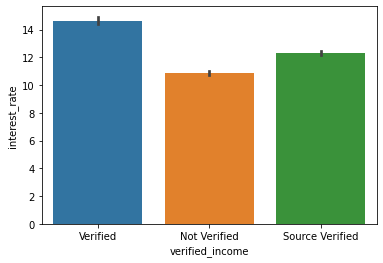

In [75]:
sns.barplot(x = 'verified_income', y = 'interest_rate', data = merge_df)

<AxesSubplot:xlabel='issue_month', ylabel='interest_rate'>

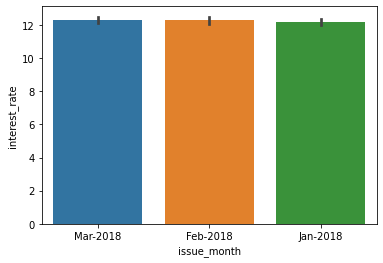

In [76]:
sns.barplot(x = 'issue_month', y = 'interest_rate', data = merge_df)

<AxesSubplot:xlabel='term', ylabel='interest_rate'>

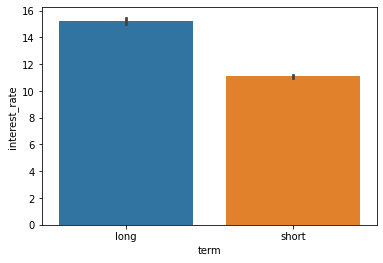

In [77]:
sns.barplot(x = 'term', y = 'interest_rate', data = merge_df)

<AxesSubplot:xlabel='initial_listing_status', ylabel='interest_rate'>

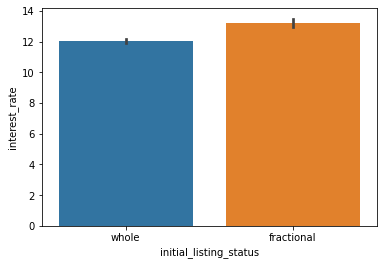

In [78]:
sns.barplot(x = 'initial_listing_status', y = 'interest_rate', data = merge_df)

<AxesSubplot:xlabel='loan_purpose', ylabel='interest_rate'>

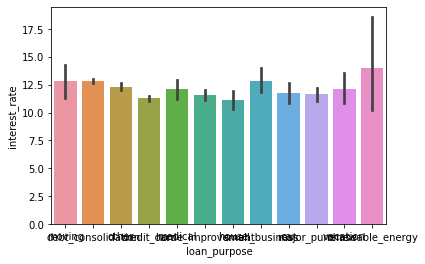

In [79]:
sns.barplot(x = 'loan_purpose', y = 'interest_rate', data = merge_df)

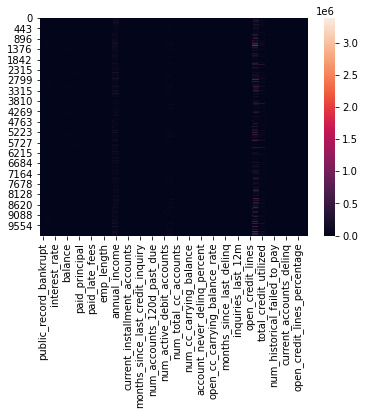

In [80]:
#plot heat map
numeric_heat = sns.heatmap(merge_df[num_cols])

In [81]:
merge_df[num_cols]

,public_record_bankrupt,loan_amount,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees,emp_title,emp_length,state,annual_income,debt_to_income,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,open_cc_acounts_rate,open_cc_carrying_balance_rate,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,open_credit_lines_percentage,credit_utilized_rate
0,0,28000,14.07,652.53,27015.86,1999.33,984.14,1015.19,0.0,0.000100,3.000000,0.0338,90000.0,18.01,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0.571429,0.428571,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,0.357143,0.547595
1,1,5000,12.61,167.54,4651.37,499.12,348.63,150.49,0.0,0.000100,10.000000,0.0035,40000.0,5.04,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0.583333,0.166667,0,0.0,1996,1,30,14,28800,4321,0,1,0.0,0,0,0.466667,0.150035
3,0,21600,6.72,664.19,18853.26,3312.89,2746.74,566.15,0.0,0.001800,1.000000,0.0298,30000.0,10.16,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1.000000,0.666667,0,0.0,2007,0,4,4,25400,4997,0,1,0.0,0,0,1.000000,0.196732
5,0,5000,6.72,153.75,4256.71,873.13,743.29,129.84,0.0,0.000193,5.930306,0.0097,34000.0,6.46,0,2,5.0,12,0.0,0,1,27200,27,12,5,3,78.1,0.444444,0.185185,1,3.0,1990,6,32,12,42100,3898,0,0,60.0,0,0,0.375000,0.092589
7,0,20000,11.99,444.79,19005.39,1765.84,994.61,771.23,0.0,0.000400,10.000000,0.0255,110000.0,16.19,2,4,7.0,15,0.0,0,5,22250,16,12,10,7,93.0,0.750000,0.625000,1,19.0,2005,1,30,15,342336,60805,0,0,71.0,0,0,0.500000,0.177618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,4800,10.41,155.81,1854.81,3064.65,2945.19,119.46,0.0,0.000100,1.000000,0.0235,40000.0,12.07,8,3,16.0,13,0.0,0,3,11800,5,5,3,0,88.9,1.000000,0.600000,0,62.0,2008,0,18,13,50932,46132,0,0,62.0,0,0,0.722222,0.905757
9995,1,24000,7.35,744.90,21586.34,2969.80,2413.66,556.14,0.0,0.002900,10.000000,0.0806,108000.0,22.28,3,8,6.0,13,0.0,0,4,44600,22,9,4,1,100.0,0.409091,0.181818,0,0.0,2008,5,44,13,199195,77963,0,1,0.0,0,0,0.295455,0.391390
9996,0,10000,19.03,366.72,9147.44,1456.31,852.56,603.75,0.0,0.004600,8.000000,0.0298,121000.0,32.38,3,0,1.0,15,0.0,0,5,28200,18,11,8,2,82.1,0.611111,0.444444,4,9.0,1994,1,28,15,382061,101571,0,0,9.0,0,0,0.535714,0.265850
9998,0,24000,5.32,722.76,21518.12,2873.31,2481.88,391.43,0.0,0.021800,1.000000,0.0128,80000.0,11.99,2,2,5.0,15,0.0,0,1,46000,15,9,2,6,100.0,0.600000,0.133333,0,0.0,1999,1,38,15,294475,27641,0,0,0.0,0,0,0.394737,0.093865


/Users/xulehao/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/xulehao/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/xulehao/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

/Users/xulehao/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/xulehao/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/xulehao/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

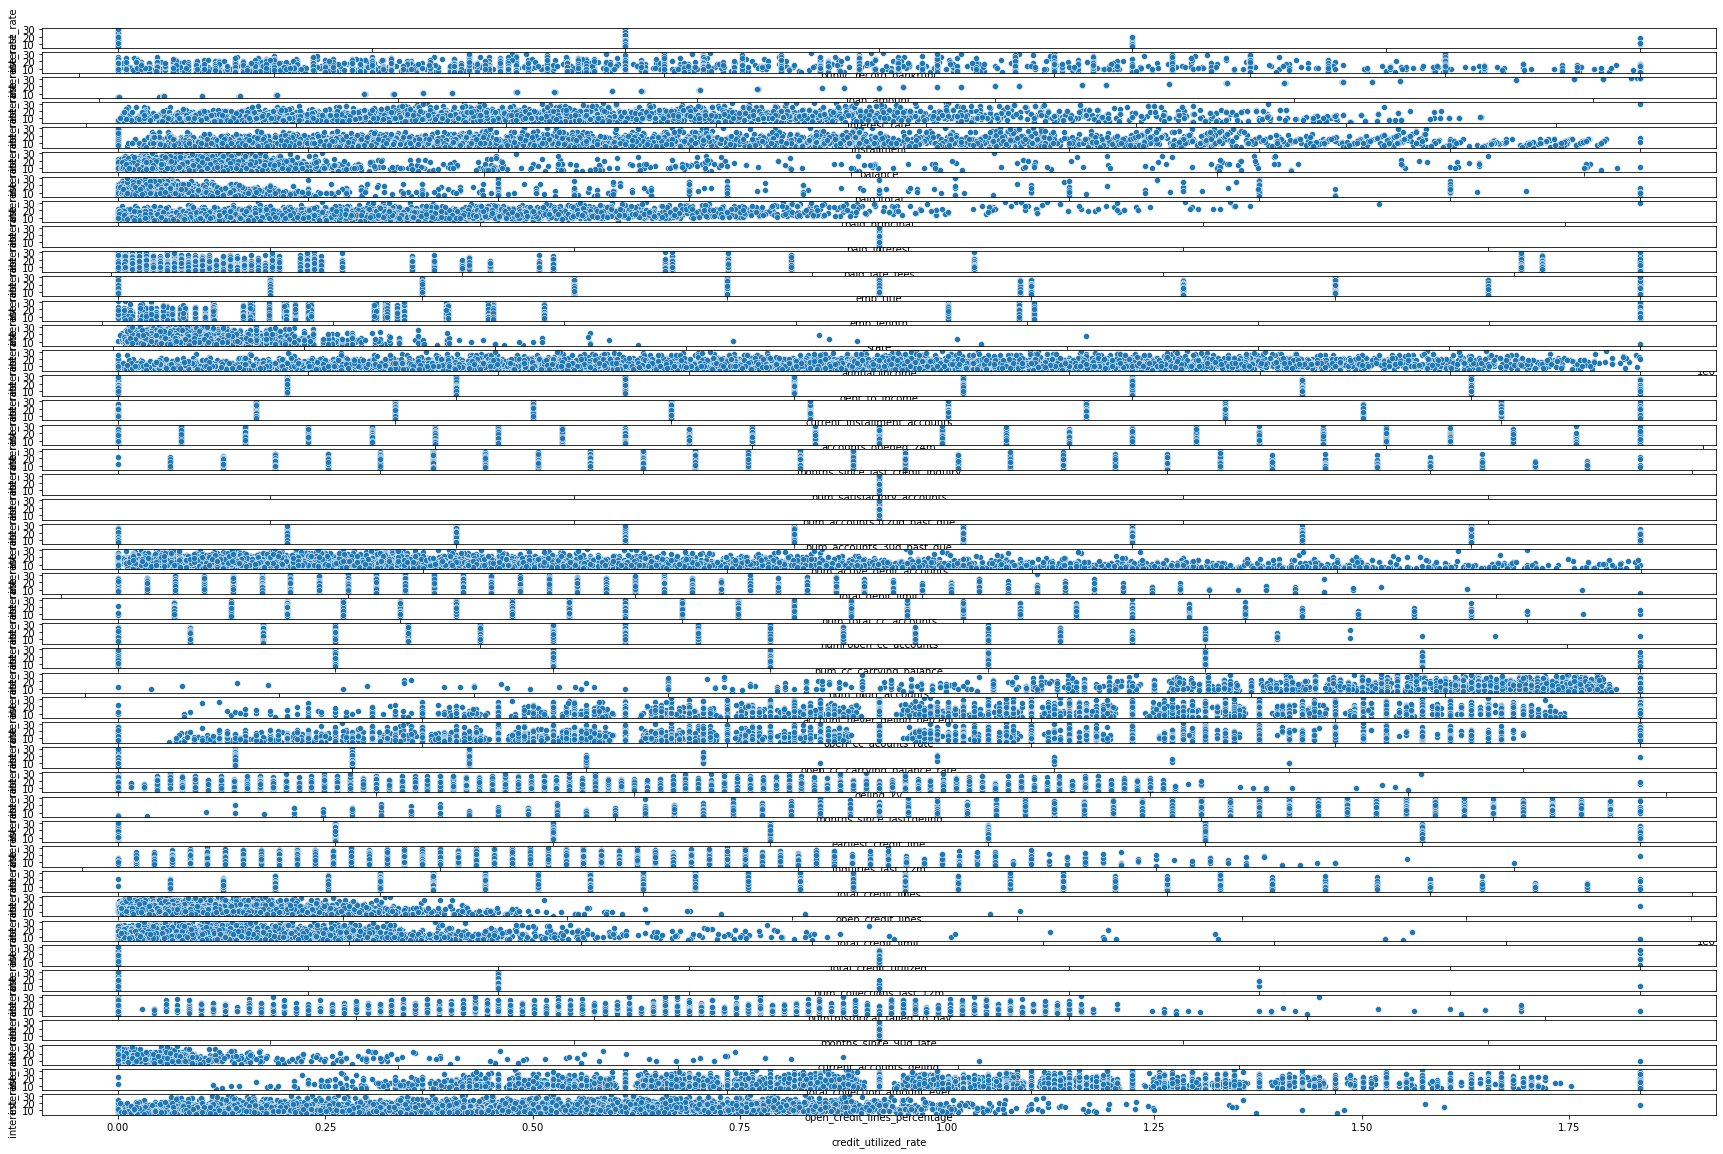

In [82]:
count=1
plt.subplots(figsize=(30, 20))
for i in merge_df[num_cols].columns:
    plt.subplot(len(merge_df[num_cols].columns),1,count)
    sns.scatterplot(merge_df[i],merge_df["interest_rate"])
    count+=1

plt.show()

## Encoding Categorical features

In [83]:
X = merge_df.drop(['interest_rate'],axis=1)
y = merge_df.loc[:, 'interest_rate'].values

In [84]:
X = pd.get_dummies(X)

## train_test_split

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Feature scaling

In [86]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train[:, [1,2,3,4,5,6,9,11,12,13,14,15,16,19,20,21,22,23,24,25,26,27,28,31,32,33,34,35,36,40,41,43,44,45,46,47,50,51]] = sc.fit_transform(X_train[:, [1,2,3,4,5,6,9,11,12,13,14,15,16,19,20,21,22,23,24,25,26,27,28,31,32,33,34,35,36,40,41,43,44,45,46,47,50,51]])
# X_test[:, [1,2,3,4,5,6,9,11,12,13,14,15,16,19,20,21,22,23,24,25,26,27,28,31,32,33,34,35,36,40,41,43,44,45,46,47,50,51]] = sc.transform(X_test[:, [1,2,3,4,5,6,9,11,12,13,14,15,16,19,20,21,22,23,24,25,26,27,28,31,32,33,34,35,36,40,41,43,44,45,46,47,50,51]])

## Linear Regression

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

#prediction
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

19.451364489271864
[ 2.57344361e-03 -5.83556685e-06  2.85697983e-04 -2.64162194e-06
  2.29937955e+00 -2.29938352e+00 -2.29941926e+00  1.03189102e-07
  5.07858631e-01  9.48738198e-04  1.17611158e-02  1.17229703e-07
  8.65366762e-04 -6.25682466e-03  8.60331825e-04 -2.88605913e-04
 -1.31998170e-03  1.52429458e-12 -7.32956751e-12 -7.59362017e-04
  3.66695444e-07  3.87686579e-03 -8.66286624e-03 -1.73713552e-03
  1.50180904e-03 -7.20356091e-04  3.79255375e-02  2.01184858e-02
 -4.94117309e-03 -4.22191483e-05 -3.00034814e-04  6.67225399e-04
 -1.97386986e-03  6.16330229e-03 -9.40704248e-09 -6.38086428e-09
 -2.54341359e-03  1.45468961e-03 -9.85740731e-06 -3.97459843e-13
  2.92636426e-06 -3.81785051e-02  1.64491855e-02  1.11865171e-03
 -1.11865171e-03 -6.62065176e-03 -1.02831572e-02 -2.13304635e-03
 -1.88927153e-03 -1.92764971e-03  8.43700973e-03  1.15307204e-02
  3.00430243e-03 -2.97969445e-02  3.20809066e-02 -1.12684501e-02
  8.86623192e-03  1.34559031e-13  3.72300380e-02 -3.72300380e-02
 -1.00

In [88]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [89]:
mape(y_test, y_pred)

0.3625272129555691

## Random Forest

In [90]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
rf.fit(X_train, y_train) 

#prediction
Y_pred = rf.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
mape(y_test, y_pred)

Mean Absolute Error: 0.04722052497503827
Mean Squared Error: 0.005734904952980435
Root Mean Squared Error: 0.07572915523746739


0.3625272129555691

## Feature Importance

In [91]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_list = X.columns
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: grade_A              Importance: 0.42
Variable: grade_B              Importance: 0.29
Variable: grade_C              Importance: 0.18
Variable: grade_D              Importance: 0.05
Variable: sub_grade_B5         Importance: 0.01
Variable: sub_grade_C5         Importance: 0.01
Variable: sub_grade_D5         Importance: 0.01
Variable: public_record_bankrupt Importance: 0.0
Variable: loan_amount          Importance: 0.0
Variable: installment          Importance: 0.0
Variable: balance              Importance: 0.0
Variable: paid_total           Importance: 0.0
Variable: paid_principal       Importance: 0.0
Variable: paid_interest        Importance: 0.0
Variable: paid_late_fees       Importance: 0.0
Variable: emp_title            Importance: 0.0
Variable: emp_length           Importance: 0.0
Variable: state                Importance: 0.0
Variable: annual_income        Importance: 0.0
Variable: debt_to_income       Importance: 0.0
Variable: current_installment_accounts Importance: 

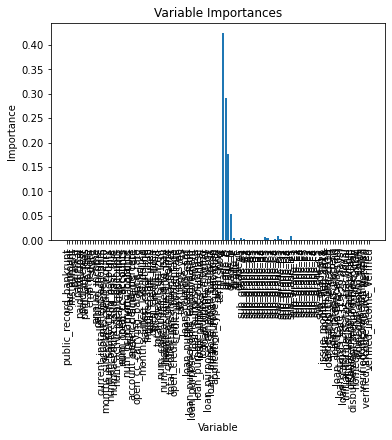

In [92]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');